In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

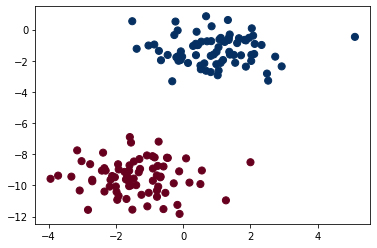

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(150, 2, centers=2, random_state=2, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [3]:
lr = 0.0001
lambda_v = 0.001
epochs = 100

In [4]:
def train(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    y_ = np.where(y <= 0, -1, 1)
    m, n = X.shape
    
    rgen = np.random.RandomState(8)
    w = rgen.normal(loc=0.0, scale=0.01, size=n)
    b = 0
    
    for _ in range(epochs):
        net_output = np.dot(X, w) - b
        for i, xi in enumerate(net_output):
            if xi >= 1:
                w -= lr * (2 * lambda_v * w)
            else:
                w -= lr*((2 * lambda_v * w) - np.dot(xi, y[i]))
                b -= lr*y[i]
    
    return w, b

In [5]:
def predict(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray :
    net_output = np.dot(X, w) - b
    return np.sign(net_output)

In [6]:
w, b = train(X, y)


In [34]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w * x + b + offset) / w #geometric margin

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=50, cmap='RdBu')

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])
        x = np.array([x0_1, x0_2])
        
        hyperplane = get_hyperplane_value(x, w, b, 0)
        
        hyperplane_m = get_hyperplane_value(x, w, b, -1)

        hyperplane_p = get_hyperplane_value(x, w, b, 1)

        ax.plot([x0_1, x0_2], hyperplane, "y--")
        ax.plot([x0_1, x0_2], hyperplane_m, "k")
        ax.plot([x0_1, x0_2], hyperplane_p, "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

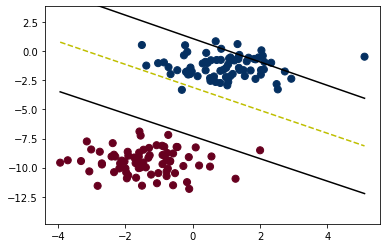

In [35]:
visualize_svm()